In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("heart.csv")
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
pd.DataFrame(scaled_array).describe()
df1 = df.copy()
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]
scaler = StandardScaler()
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis = 1)
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))


X_train: (272, 22)
X_test: (31, 22)
y_train: (272, 1)
y_test: (31, 1)
Test accuracy: 0.8387096774193549


KNN Test accuracy: 0.84


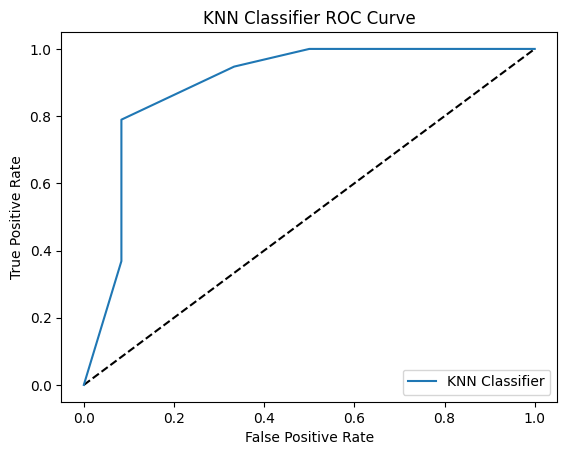

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

df = pd.read_csv("heart.csv")

# Data preprocessing

categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]
scaler = StandardScaler()
df[numeric_list[:-1]] = scaler.fit_transform(df[numeric_list[:-1]])
df = pd.get_dummies(df, columns=categorical_list[:-1], drop_first=True)
X = df.drop(["output"], axis=1)
y = df[["output"]]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# KNN Classifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("KNN Test accuracy: {:.2f}".format(accuracy_knn))

# ROC Curve

y_pred_prob_knn = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_knn, tpr_knn, label="KNN Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()


SVM Test accuracy: 0.84


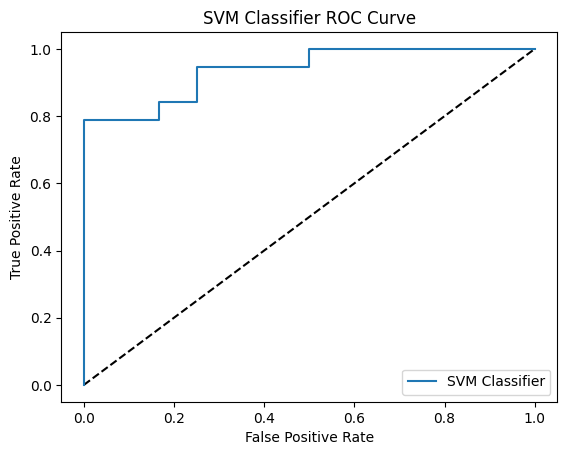

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC

# Load the dataset

df = pd.read_csv("heart.csv")

# Data preprocessing

categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]
scaler = StandardScaler()
df[numeric_list[:-1]] = scaler.fit_transform(df[numeric_list[:-1]])
df = pd.get_dummies(df, columns=categorical_list[:-1], drop_first=True)
X = df.drop(["output"], axis=1)
y = df[["output"]]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# SVM Classifier

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train.values.ravel())
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print("SVM Test accuracy: {:.2f}".format(accuracy_svm))

# ROC Curve

y_pred_prob_svm = svm_classifier.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_svm, tpr_svm, label="SVM Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset

df = pd.read_csv("heart.csv")

# Data preprocessing

categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]
scaler = StandardScaler()
df[numeric_list[:-1]] = scaler.fit_transform(df[numeric_list[:-1]])
df = pd.get_dummies(df, columns=categorical_list[:-1], drop_first=True)
X = df.drop(["output"], axis=1)
y = df[["output"]]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train.values.ravel())
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print("Random Forest Test Accuracy: {:.2f}%".format(accuracy_rf * 100))

Random Forest Test Accuracy: 83.87%


In [7]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset

df = pd.read_csv(r"C:\Users\aikan\Downloads\Wallpaper\CIE 4\AI\project2\heart.csv")

# Data preprocessing

categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
df_encoded = pd.get_dummies(df, columns=categorical_list, drop_first=True)
X = df_encoded.drop("output", axis=1)
y = df_encoded["output"]

# Feature scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=3)

# XGBoost Classifier

gbm = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
gbm.fit(X_train, y_train)
y_pred_prob = gbm.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.84
